In [67]:
#Investment Portfolio Optimization with Python
#http://www.pythonforfinance.net/2017/01/21/investment-portfolio-optimisation-with-python/

In [1]:
import pandas_datareader.data as web
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ffn
stock = ['AAPL']
data = web.DataReader(stock, data_source="yahoo", start='01/01/2010')['Adj Close']
returns = data.pct_change()
mean_return = returns.mean()
return_std = returns.std()
annualized_return = round(mean_return * 252, 2)
annualized_std = round(return_std * np.sqrt(252), 2)
print('The annualized mean return of stock {} is {} and the annualized volatility is {}'.format(stock[0], annualized_return, annualized_std))

BQInputRejected: 编译错误，1: 抱歉，平台暂时不支持此模块：pandas_datareader.data

In [69]:
#list of stocks in portfolio
#NOTE THAT THESE MUST BE ENTERED IN ALPHABETICAL ORDER FOR THE RESULTS TO BE CORRECT!!!
stocks = ['AAPL','AMZN','MSFT','JPM']

#download daily price data for each of the stocks in the portfolio
data = web.DataReader(stocks,data_source='yahoo',start='01/01/2010')['Adj Close']

data.sort_index(inplace=True)

#convert daily stock prices into daily returns
returns = data.pct_change()

#calculate mean daily return and covariance of daily returns
mean_daily_returns = returns.mean()
cov_matrix = returns.cov()

#set array holding portfolio weights of each stock
weights = np.asarray([0.5,0.2,0.2,0.1])

#calculate annualised portfolio return
portfolio_return = round(np.sum(mean_daily_returns * weights) * 252,2)
#calculate annualised portfolio volatility
portfolio_std_dev = round(np.sqrt(np.dot(weights.T,np.dot(cov_matrix, weights))) * np.sqrt(252),2)

print('Portfolio expected annualized return is {} and volatility is {}'.format(portfolio_return,portfolio_std_dev))

Portfolio expected annualized return is 0.25 and volatility is 0.2


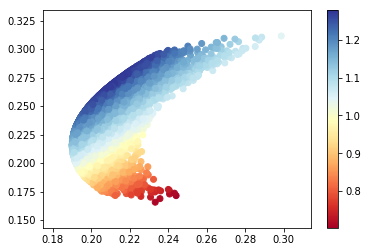

In [70]:
import pandas_datareader.data as web
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ffn

#list of stocks in portfolio
stocks = ['AAPL','AMZN','MSFT','JPM']

#download daily price data for each of the stocks in the portfolio
data = web.DataReader(stocks,data_source='yahoo',start='01/01/2010')['Adj Close']

data.sort_index(inplace=True)

#convert daily stock prices into daily returns
returns = data.pct_change()

#calculate mean daily return and covariance of daily returns
mean_daily_returns = returns.mean()
cov_matrix = returns.cov()

#set number of runs of random portfolio weights
num_portfolios = 25000

#set up array to hold results
results = np.zeros((3,num_portfolios))


for i in range(num_portfolios):
    #select random weights for portfolio holdings
    weights = np.random.random(4)
    #rebalance weights to sum to 1
    weights /= np.sum(weights)
    
    #calculate portfolio return and volatility
    portfolio_return = np.sum(mean_daily_returns * weights) * 252
    portfolio_std_dev = np.sqrt(np.dot(weights.T,np.dot(cov_matrix, weights))) * np.sqrt(252)
    
    #store results in results array
    results[0,i] = portfolio_return
    results[1,i] = portfolio_std_dev
    #store Sharpe Ratio (return / volatility) - risk free rate element excluded for simplicity
    results[2,i] = results[0,i] / results[1,i]

#convert results array to Pandas DataFrame
results_frame = pd.DataFrame(results.T,columns=['ret','stdev','sharpe'])

#create scatter plot coloured by Sharpe Ratio
plt.scatter(results_frame.stdev,results_frame.ret,c=results_frame.sharpe,cmap='RdYlBu')
plt.colorbar();

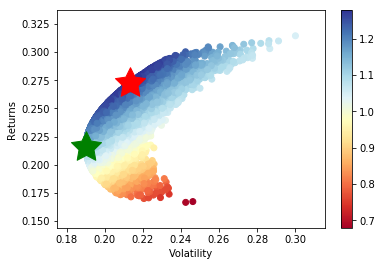

In [78]:
import pandas_datareader.data as web
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ffn

#list of stocks in portfolio
stocks = ['AAPL','AMZN','MSFT','JPM']

#download daily price data for each of the stocks in the portfolio
data = web.DataReader(stocks,data_source='yahoo',start='01/01/2010')['Adj Close']

data.sort_index(inplace=True)

#convert daily stock prices into daily returns
returns = data.pct_change()

#calculate mean daily return and covariance of daily returns
mean_daily_returns = returns.mean()
cov_matrix = returns.cov()

#set number of runs of random portfolio weights
num_portfolios = 25000

#set up array to hold results
#We have increased the size of the array to hold the weight values for each stock
results = np.zeros((4+len(stocks)-1,num_portfolios))

for i in range(num_portfolios):
    #select random weights for portfolio holdings
    weights = np.array(np.random.random(4))
    #rebalance weights to sum to 1
    weights /= np.sum(weights)
    
    #calculate portfolio return and volatility
    portfolio_return = np.sum(mean_daily_returns * weights) * 252
    portfolio_std_dev = np.sqrt(np.dot(weights.T,np.dot(cov_matrix, weights))) * np.sqrt(252)
    
    #store results in results array
    results[0,i] = portfolio_return
    results[1,i] = portfolio_std_dev
    #store Sharpe Ratio (return / volatility) - risk free rate element excluded for simplicity
    results[2,i] = results[0,i] / results[1,i]
    #iterate through the weight vector and add data to results array
    for j in range(len(weights)):
        results[j+3,i] = weights[j]

#convert results array to Pandas DataFrame
results_frame = pd.DataFrame(results.T,columns=['ret','stdev','sharpe',stocks[0],stocks[1],stocks[2],stocks[3]])

#locate position of portfolio with highest Sharpe Ratio
max_sharpe_port = results_frame.iloc[results_frame['sharpe'].idxmax()]
#locate positon of portfolio with minimum standard deviation
min_vol_port = results_frame.iloc[results_frame['stdev'].idxmin()]

#create scatter plot coloured by Sharpe Ratio
plt.scatter(results_frame.stdev,results_frame.ret,c=results_frame.sharpe,cmap='RdYlBu')
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.colorbar()
#plot red star to highlight position of portfolio with highest Sharpe Ratio
plt.scatter(max_sharpe_port[1],max_sharpe_port[0],marker=(5,1,0),color='r',s=1000)
#plot green star to highlight position of minimum variance portfolio
plt.scatter(min_vol_port[1],min_vol_port[0],marker=(5,1,0),color='g',s=1000);

In [60]:
print(max_sharpe_port)

ret       0.271578
stdev     0.212508
sharpe    1.277962
AAPL      0.471393
AMZN      0.338431
MSFT      0.042877
JPM       0.147299
Name: 10561, dtype: float64


In [61]:
print(min_vol_port)

ret       0.215494
stdev     0.190179
sharpe    1.133112
AAPL      0.273874
AMZN      0.090209
MSFT      0.254636
JPM       0.381282
Name: 24971, dtype: float64
